[![Binder](https://mybinder.org/badge_logo.svg)](https://nbviewer.org/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/contents/vector_quantization/VQ_grayscale_image.ipynb)

[![Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=notebook)](https://colab.research.google.com/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/contents/vector_quantization/VQ_grayscale_image.ipynb)


# Vector Quantization (in the 2D domain) of a color (RGB) image

See [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

In [1]:
%%bash
if [ -d "$HOME/repos" ]; then
    echo "\"$HOME/repos\" exists"
else
    mkdir ~/repos
    echo Created $HOME/repos
fi

"/home/vruiz/repos" exists


In [2]:
%%bash
if [ -d "$HOME/repos/scalar_quantization" ]; then
    cd $HOME/repos/scalar_quantization
    echo "$HOME/repos/scalar_quantization ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/scalar_quantization.git
fi

/home/vruiz/repos/scalar_quantization ... 
Ya está actualizado.


In [3]:
%%bash
if [ -d "$HOME/repos/image_IO" ]; then
    cd $HOME/repos/image_IO
    echo "$HOME/repos/image_IO ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/image_IO.git
fi

/home/vruiz/repos/image_IO ... 
Ya está actualizado.


In [4]:
%%bash
if [ -d "$HOME/repos/MRVC" ]; then
    cd $HOME/repos/MRVC
    echo "$HOME/repos/MRVC ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/Sistemas-Multimedia/MRVC.git
fi

/home/vruiz/repos/MRVC ... 
Ya está actualizado.


In [5]:
!ln -sf ~/repos/information_theory/information.py .
!ln -sf ~/repos/information_theory/distortion.py .
!ln -sf ~/repos/image_IO/image_3.py .
!ln -sf ~/repos/image_IO/logging_config.py .

In [6]:
try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
%matplotlib inline

try:
    import scipy
except:
    !pip install scipy

import numpy as np

try:
    import cv2
except:
    !pip install opencv-python
    !pip install opencv-python-headless # Binder compatibility

try:
    from sklearn import cluster
except:
    !pip install sklearn
    from sklearn import cluster

import os
import pylab

try:
    import colored
except:
    !pip install colored

import image_1 as gray_image

try:
    import skimage
except:
    !pip install scikit-image
    import skimage
    
import distortion
import math
import image_3 as RGB_image

#!ln -sf ~/repos/DCT/color_DCT.py . # Does not work :-/
#import color_DCT as YUV
#!ln -sf ~/repos/YCrCb/YCrCb.py .
#import YCrCb as YUV
!ln -sf ~/repos/YCoCg/YCoCg.py .
import YCoCg as YUV
#!ln -sf ~/repos/RGB/RGB.py
#import RGB as YUV

import gzip
#import logging
#logger = logging.getLogger(__name__)
#logger.setLevel(logging.WARNING)

## Configuration

In [137]:
home = os.environ["HOME"]
fn = home + "/repos/MRVC/images/lena_color/"
block_side = 2
block_width = block_side
block_height = block_side
N_components = 3
n_clusters = 256  # Number of bins
N_tries = 3  # Number of times K-means is run
#range_of_N_bins = range(2, 256, 1)
range_of_N_bins = [1<<i for i in range(1, 8)]
#range_of_N_bins = [1<<i for i in range(1, 10)]

#RGB_image.write = RGB_image.debug_write # Faster, but lower compression
#RGB_image.write = RGB_image.write # The fastest, but returns only an estimation of the length

In [138]:
!cat logging_config.py

import logging
logging.basicConfig(format="[%(filename)s:%(lineno)s %(funcName)s() %(levelname)s] %(message)s")


## Read the image and show it

[image_3.py:42 read() INFO] /home/vruiz/repos/MRVC/images/lena_color/000.png (512, 512, 3) uint8 len=512673 max=255 min=1
[image_3.py:91 print_stats() INFO] component=0 max=255 min=54 avg=180.22401428222656
[image_3.py:91 print_stats() INFO] component=1 max=248 min=1 avg=99.05646133422852
[image_3.py:91 print_stats() INFO] component=2 max=239 min=8 avg=105.41263198852539


(512, 512, 3)


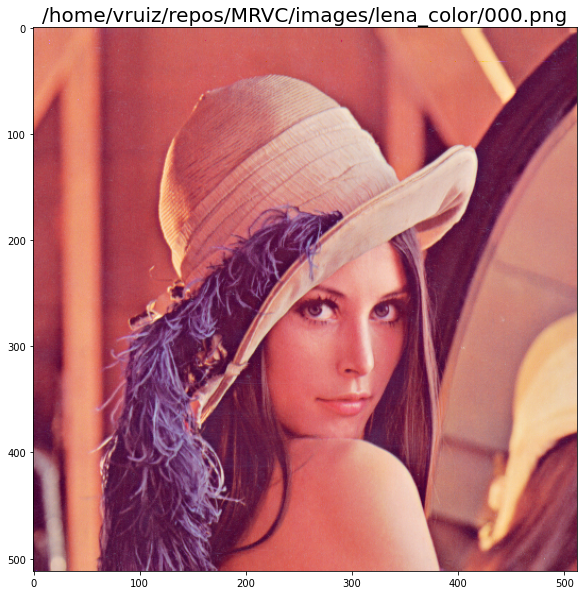

In [139]:
img = RGB_image.read(fn)
RGB_image.show(img, fn + "000.png")
print(img.shape)

## Example

In [140]:
block_width*block_height*N_components

3072

In [141]:
block_length = block_width*block_height*N_components
np.random.seed(seed=1)  # makes the random numbers predictable
k_means = cluster.KMeans(init="k-means++", n_clusters=n_clusters, n_init=N_tries)
blocks = []
for i in range(0, img.shape[0], block_width):
    for j in range(0, img.shape[1], block_height):
        blocks.append(np.reshape(img[i:i + block_width, j:j + block_height], block_length))
blocks = np.asarray(blocks).astype(float)
k_means.fit(blocks)
centroids = k_means.cluster_centers_.squeeze().astype(np.uint8)  # the code-book
labels = k_means.labels_  # Labels of the centroids

labels = labels.reshape(img.shape[0]//block_height, img.shape[1]//block_width)
img_dequantized = np.empty_like(img)
for i in range(0, img.shape[0], block_width):
    for j in range(0, img.shape[1], block_height):
        img_dequantized[i:i + block_width, j:j + block_height] = centroids[labels[i//block_width,j//block_height]].reshape(block_height, block_width, N_components)

[image_3.py:91 print_stats() INFO] component=0 max=255 min=54 avg=180.22401428222656
[image_3.py:91 print_stats() INFO] component=1 max=248 min=1 avg=99.05646133422852
[image_3.py:91 print_stats() INFO] component=2 max=239 min=8 avg=105.41263198852539


centroids =
 [[222 111  82 ... 204 102  97]
 [136  50  75 ... 185  74  81]
 [183 109 112 ... 203 136 127]
 ...
 [160  54  70 ... 173  63  73]
 [205 101  96 ... 205  99 101]
 [212 134 122 ... 206 127 127]]
256 centroids (8 bits/block)
16x16 blocks (vectors) in the image
total number of output bytes = 256


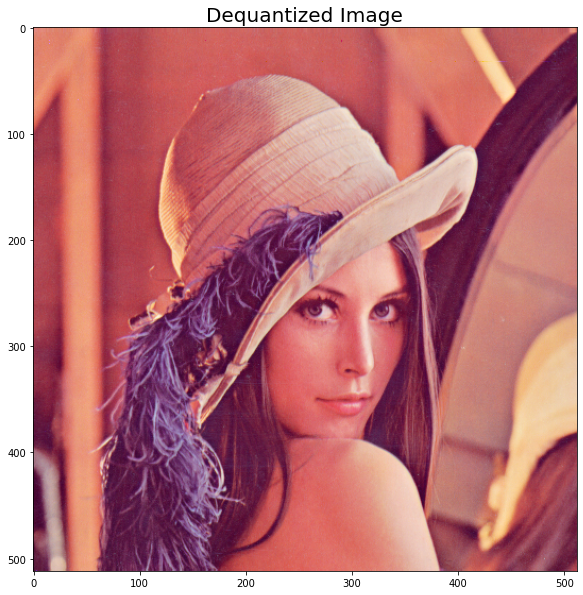

In [142]:
RGB_image.show(img_dequantized, "Dequantized Image")
assert len(centroids) == n_clusters
print("centroids =\n", centroids)
bits_per_block = int(math.log(n_clusters)/math.log(2))
print(f"{len(centroids)} centroids ({bits_per_block} bits/block)")
blocks_in_y = img.shape[0]//block_height
blocks_in_x = img.shape[1]//block_width
print(f"{blocks_in_y}x{blocks_in_x} blocks (vectors) in the image")
number_of_blocks = blocks_in_y*blocks_in_x
total_number_of_bits = number_of_blocks*bits_per_block
print(f"total number of output bytes = {total_number_of_bits//8}")

In [143]:
centroids.shape

(256, 3072)

In [144]:
centroids.dtype

dtype('uint8')

## RD performance

ln: fallo al crear el enlace simbólico './information.py': El fichero ya existe


[image_3.py:91 print_stats() INFO] component=0 max=215 min=131 avg=179.71181106567383
[image_3.py:91 print_stats() INFO] component=1 max=137 min=51 avg=98.55135345458984
[image_3.py:91 print_stats() INFO] component=2 max=127 min=80 avg=104.90397262573242
[image_1.py:70 print_stats() INFO] max=76835942.0 min=31855850.0 avg=56981448.265625
[image_1.py:47 write() INFO] Before optipng: 138 bytes
[image_1.py:55 write() INFO] image_1.write: /tmp/2_000.png (16, 16) uint8 len=127 max=1 min=0
[image_3.py:57 write() INFO] Before optipng: 2390 bytes
[image_3.py:65 write() INFO] /tmp/codebook2_000.png (2, 1024, 3) uint8 len=2217 max=215 min=51


(2, 3072)
len(centroids_energy) = 2
centroids_energy = [76835942. 31855850.]
argsort_centroids = [1 0]
[31855850. 76835942.]
Quantization indexes:  [0 1]
code-book length = 2
code-book size = 6144
code-book bytes2 = 2217


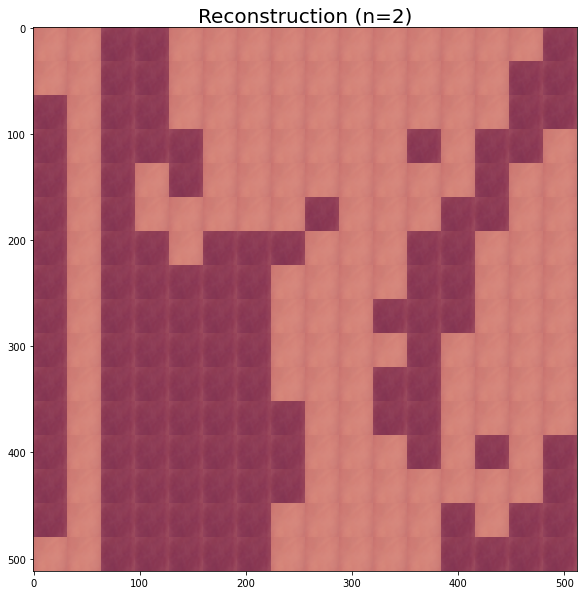

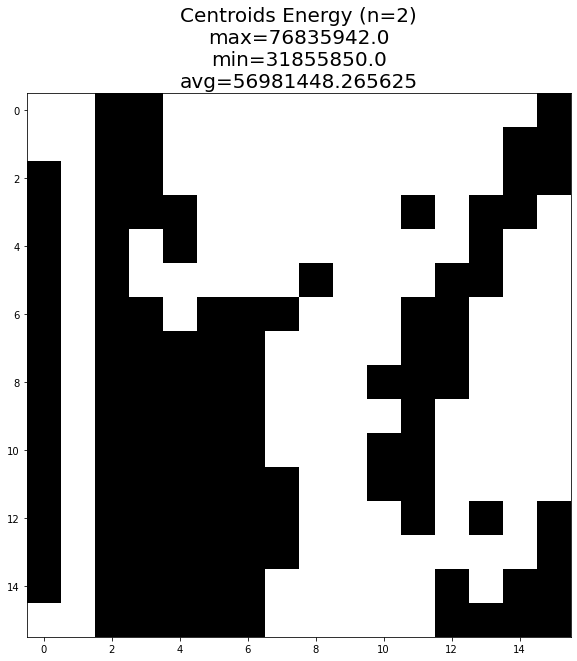

n=  2, rate=0.06894938151041667 bits/pixel, distortion=  35.3


[image_3.py:91 print_stats() INFO] component=0 max=231 min=107 avg=179.73566818237305
[image_3.py:91 print_stats() INFO] component=1 max=193 min=37 avg=98.57421875
[image_3.py:91 print_stats() INFO] component=2 max=172 min=74 avg=104.91930770874023
[image_1.py:70 print_stats() INFO] max=108580700.0 min=24535885.0 avg=57967752.90625
[image_1.py:47 write() INFO] Before optipng: 167 bytes
[image_1.py:55 write() INFO] image_1.write: /tmp/4_000.png (16, 16) uint8 len=165 max=3 min=0
[image_3.py:57 write() INFO] Before optipng: 5362 bytes
[image_3.py:65 write() INFO] /tmp/codebook4_000.png (4, 1024, 3) uint8 len=4910 max=231 min=37


(4, 3072)
len(centroids_energy) = 4
centroids_energy = [7.6394984e+07 2.4535885e+07 1.0858070e+08 4.8743726e+07]
argsort_centroids = [1 3 0 2]
[2.4535885e+07 4.8743726e+07 7.6394984e+07 1.0858070e+08]
Quantization indexes:  [0 1 2 3]
code-book length = 4
code-book size = 12288
code-book bytes2 = 4910


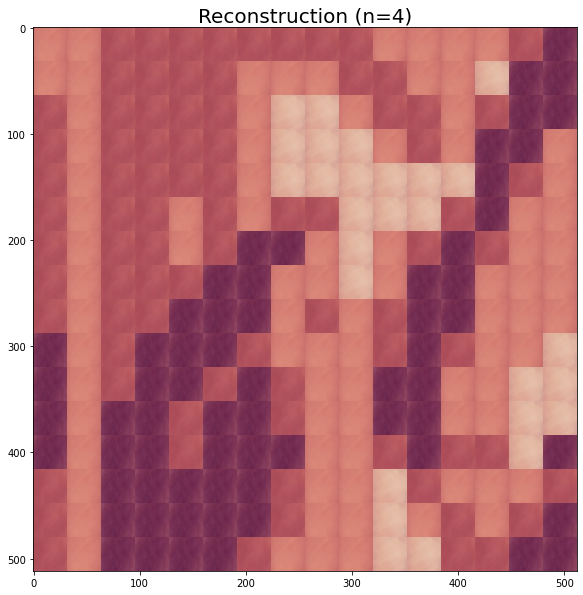

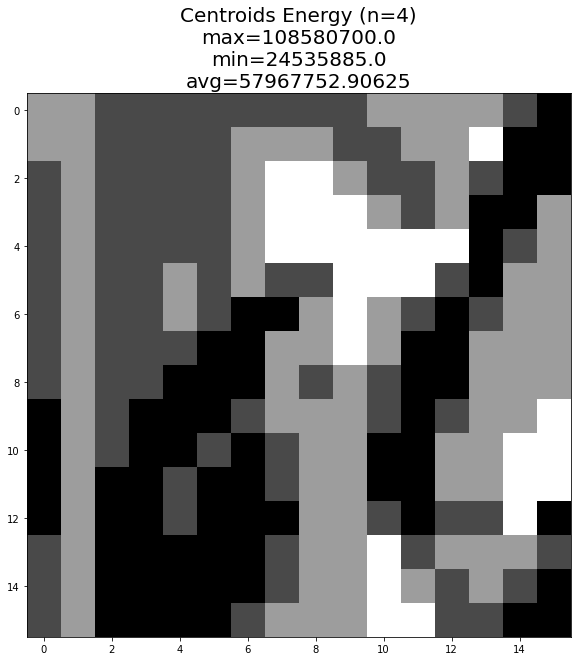

n=  4, rate=0.151519775390625 bits/pixel, distortion=  30.5


[image_3.py:91 print_stats() INFO] component=0 max=239 min=95 avg=179.74229049682617
[image_3.py:91 print_stats() INFO] component=1 max=194 min=24 avg=98.57373428344727
[image_3.py:91 print_stats() INFO] component=2 max=173 min=66 avg=104.92768859863281
[image_1.py:70 print_stats() INFO] max=109703591.0 min=21325449.0 avg=58519557.515625
[image_1.py:47 write() INFO] Before optipng: 197 bytes
[image_1.py:55 write() INFO] image_1.write: /tmp/8_000.png (16, 16) uint8 len=197 max=7 min=0
[image_3.py:57 write() INFO] Before optipng: 12954 bytes
[image_3.py:65 write() INFO] /tmp/codebook8_000.png (8, 1024, 3) uint8 len=12272 max=239 min=24


(8, 3072)
len(centroids_energy) = 8
centroids_energy = [8.10569130e+07 4.29990660e+07 2.13254490e+07 1.09703591e+08
 5.80382560e+07 7.35254560e+07 6.45922690e+07 3.13122140e+07]
argsort_centroids = [2 7 1 4 6 5 0 3]
[2.13254490e+07 3.13122140e+07 4.29990660e+07 5.80382560e+07
 6.45922690e+07 7.35254560e+07 8.10569130e+07 1.09703591e+08]
Quantization indexes:  [0 1 2 3 4 5 6 7]
code-book length = 8
code-book size = 24576
code-book bytes2 = 12272


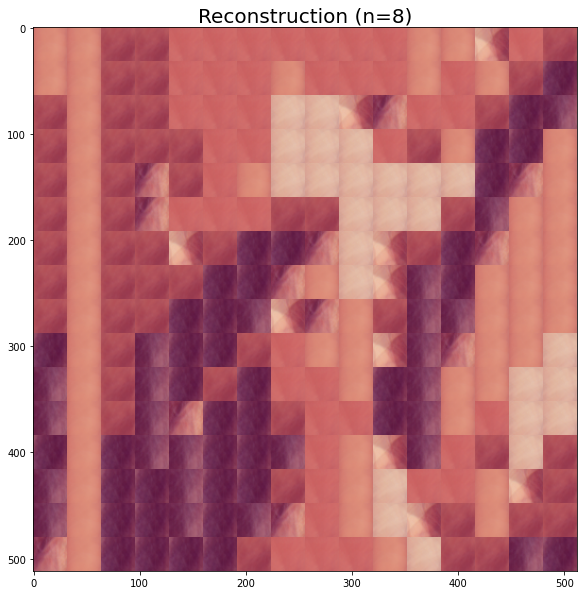

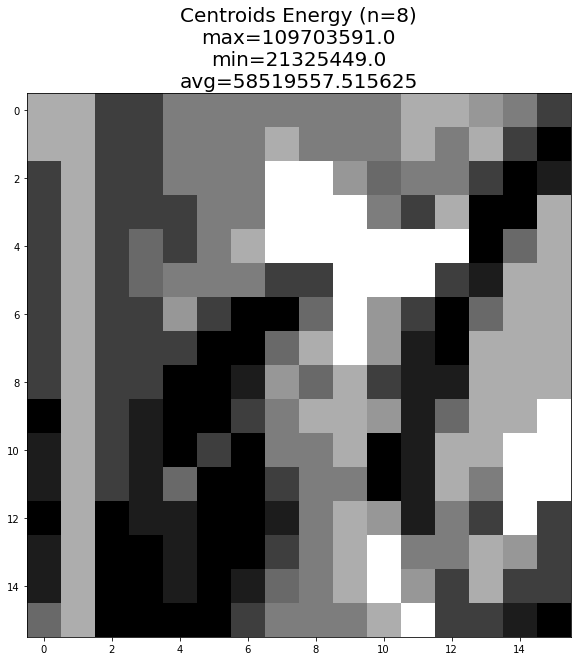

n=  8, rate=0.3765157063802083 bits/pixel, distortion=  27.4


[image_3.py:91 print_stats() INFO] component=0 max=255 min=68 avg=179.7550926208496
[image_3.py:91 print_stats() INFO] component=1 max=226 min=4 avg=98.58794403076172
[image_3.py:91 print_stats() INFO] component=2 max=198 min=46 avg=104.94005584716797
[image_1.py:70 print_stats() INFO] max=109212751.0 min=18713501.0 avg=58996105.79296875
[image_1.py:47 write() INFO] Before optipng: 215 bytes
[image_1.py:55 write() INFO] image_1.write: /tmp/16_000.png (16, 16) uint8 len=215 max=15 min=0
[image_3.py:57 write() INFO] Before optipng: 30973 bytes
[image_3.py:65 write() INFO] /tmp/codebook16_000.png (16, 1024, 3) uint8 len=29808 max=255 min=4


(16, 3072)
len(centroids_energy) = 16
centroids_energy = [5.52643060e+07 1.09212751e+08 6.10695360e+07 3.47273550e+07
 3.97238140e+07 3.10689720e+07 1.87135010e+07 5.88837580e+07
 8.23639770e+07 3.08363240e+07 7.82699780e+07 7.74207010e+07
 5.16813800e+07 5.24506400e+07 6.46998530e+07 3.33655580e+07]
argsort_centroids = [ 6  9  5 15  3  4 12 13  0  7  2 14 11 10  8  1]
[1.87135010e+07 3.08363240e+07 3.10689720e+07 3.33655580e+07
 3.47273550e+07 3.97238140e+07 5.16813800e+07 5.24506400e+07
 5.52643060e+07 5.88837580e+07 6.10695360e+07 6.46998530e+07
 7.74207010e+07 7.82699780e+07 8.23639770e+07 1.09212751e+08]
Quantization indexes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
code-book length = 16
code-book size = 49152
code-book bytes2 = 29808


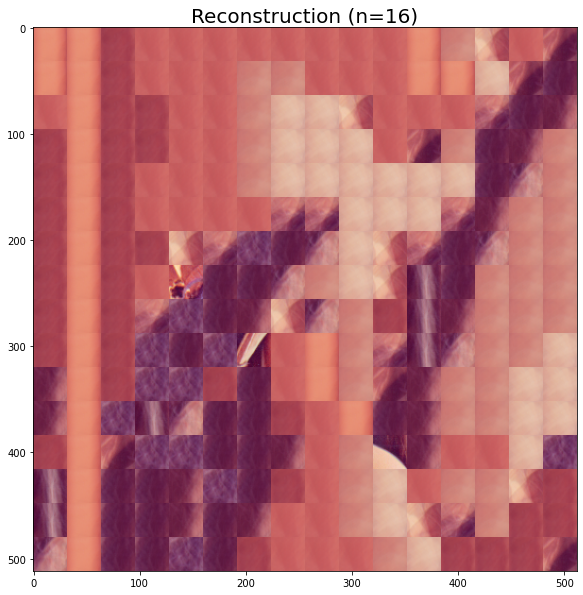

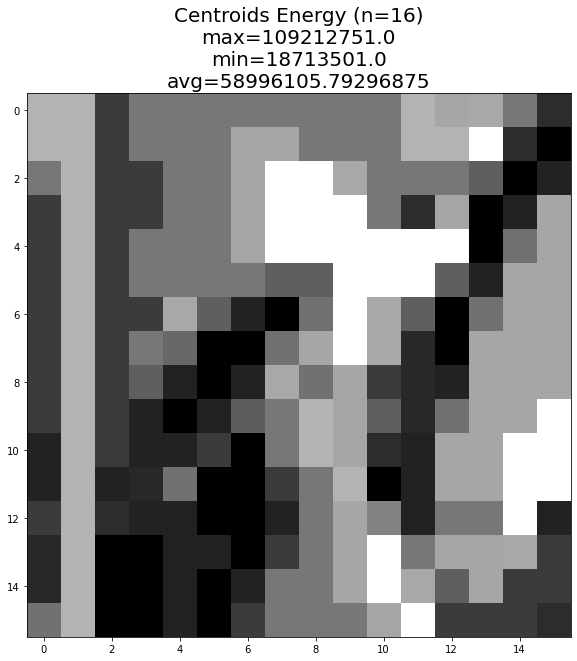

n= 16, rate=0.9118550618489584 bits/pixel, distortion=  24.4


[image_3.py:91 print_stats() INFO] component=0 max=248 min=59 avg=179.79018783569336
[image_3.py:91 print_stats() INFO] component=1 max=227 min=3 avg=98.61756134033203
[image_3.py:91 print_stats() INFO] component=2 max=218 min=41 avg=104.97504425048828
[image_1.py:70 print_stats() INFO] max=119298728.0 min=17953801.0 avg=59470734.80859375
[image_1.py:47 write() INFO] Before optipng: 253 bytes
[image_1.py:55 write() INFO] image_1.write: /tmp/32_000.png (16, 16) uint8 len=225 max=31 min=0
[image_3.py:57 write() INFO] Before optipng: 64417 bytes
[image_3.py:65 write() INFO] /tmp/codebook32_000.png (32, 1024, 3) uint8 len=61130 max=248 min=3


(32, 3072)
len(centroids_energy) = 32
centroids_energy = [9.27989300e+07 3.14057010e+07 7.14517980e+07 7.37573380e+07
 3.89810510e+07 5.82236360e+07 3.20153360e+07 7.30598700e+07
 3.25486260e+07 1.79538010e+07 5.43988160e+07 7.41902400e+07
 6.46998530e+07 1.19298728e+08 3.96843990e+07 8.58212300e+07
 3.93209430e+07 5.77643830e+07 7.26867040e+07 5.66032940e+07
 9.60316240e+07 8.32891680e+07 7.49256680e+07 5.12086780e+07
 5.21791120e+07 2.22708750e+07 6.68081950e+07 1.02215126e+08
 1.04420841e+08 8.51765770e+07 7.90730220e+07 4.60935890e+07]
argsort_centroids = [ 9 25  1  6  8  4 16 14 31 23 24 10 19 17  5 12 26  2 18  7  3 11 22 30
 21 29 15  0 20 27 28 13]
[1.79538010e+07 2.22708750e+07 3.14057010e+07 3.20153360e+07
 3.25486260e+07 3.89810510e+07 3.93209430e+07 3.96843990e+07
 4.60935890e+07 5.12086780e+07 5.21791120e+07 5.43988160e+07
 5.66032940e+07 5.77643830e+07 5.82236360e+07 6.46998530e+07
 6.68081950e+07 7.14517980e+07 7.26867040e+07 7.30598700e+07
 7.37573380e+07 7.41902400e+07

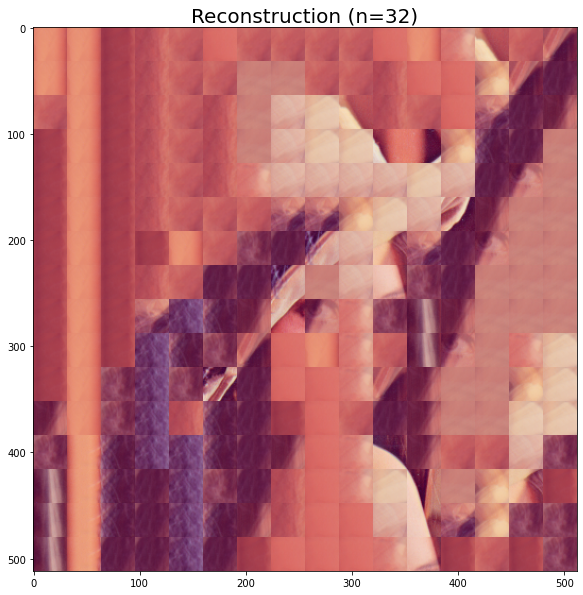

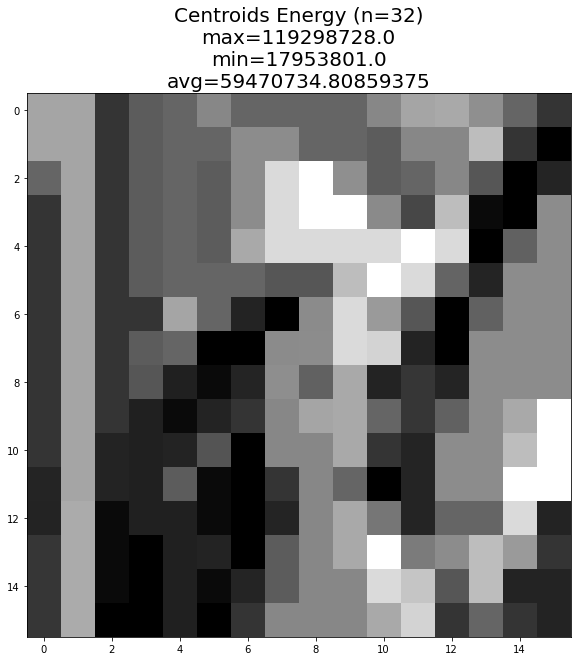

n= 32, rate=1.867828369140625 bits/pixel, distortion=  21.3


[image_3.py:91 print_stats() INFO] component=0 max=255 min=58 avg=179.84881210327148
[image_3.py:91 print_stats() INFO] component=1 max=248 min=1 avg=98.67863082885742
[image_3.py:91 print_stats() INFO] component=2 max=225 min=12 avg=105.03672790527344
[image_1.py:70 print_stats() INFO] max=122778672.0 min=17866762.0 avg=60073123.9140625
[image_1.py:47 write() INFO] Before optipng: 292 bytes
[image_1.py:55 write() INFO] image_1.write: /tmp/64_000.png (16, 16) uint8 len=261 max=63 min=0
[image_3.py:57 write() INFO] Before optipng: 141121 bytes
[image_3.py:65 write() INFO] /tmp/codebook64_000.png (64, 1024, 3) uint8 len=135936 max=255 min=1


(64, 3072)
len(centroids_energy) = 64
centroids_energy = [5.46321540e+07 2.53154160e+07 8.46142400e+07 8.77784410e+07
 5.68180330e+07 3.20010670e+07 1.19025647e+08 3.05107520e+07
 1.78667620e+07 4.67048480e+07 6.88452270e+07 5.74529720e+07
 6.46998530e+07 8.21578530e+07 1.01764769e+08 6.73641590e+07
 6.68081950e+07 3.12271960e+07 7.66327210e+07 3.67390520e+07
 2.96755580e+07 7.44033290e+07 1.13714191e+08 2.25288630e+07
 7.49256680e+07 3.73743860e+07 5.77643830e+07 5.75276140e+07
 1.17128529e+08 5.79543740e+07 5.12086780e+07 1.00081351e+08
 9.45006700e+07 3.72670130e+07 3.56480520e+07 5.97005450e+07
 5.84920810e+07 3.24913080e+07 9.44599420e+07 4.81166520e+07
 5.16813800e+07 7.91086750e+07 4.40786260e+07 4.60935890e+07
 4.29657010e+07 3.09618150e+07 5.39795780e+07 5.70022570e+07
 4.81515040e+07 6.35941610e+07 7.30598700e+07 3.16690750e+07
 6.12630640e+07 9.60316240e+07 7.26867040e+07 2.88329850e+07
 2.40148280e+07 2.95944140e+07 1.22778672e+08 4.22123450e+07
 3.45485270e+07 4.42957680e+

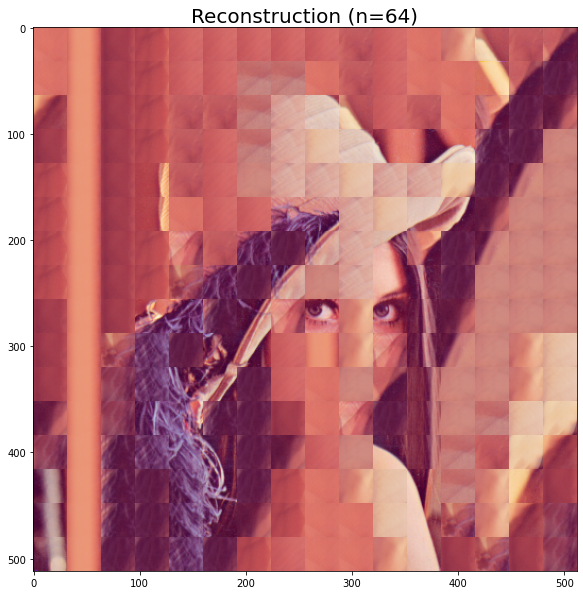

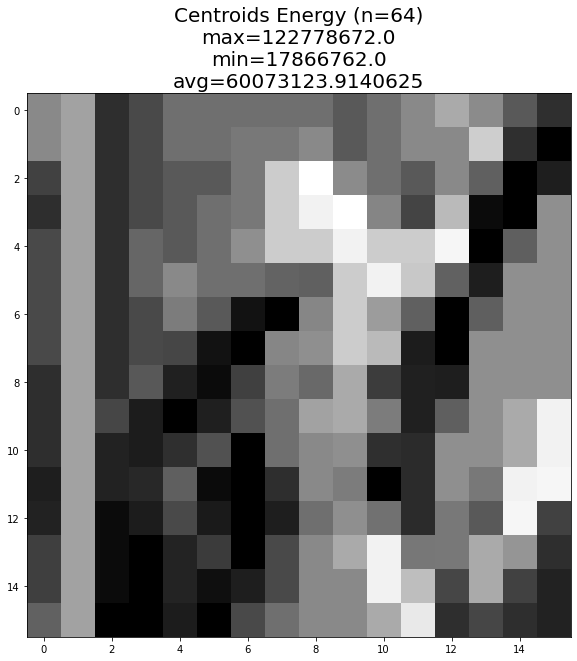

n= 64, rate=4.151092529296875 bits/pixel, distortion=  16.4


[image_3.py:91 print_stats() INFO] component=0 max=255 min=54 avg=179.9744415283203
[image_3.py:91 print_stats() INFO] component=1 max=248 min=1 avg=98.80495834350586
[image_3.py:91 print_stats() INFO] component=2 max=225 min=12 avg=105.16159439086914
[image_1.py:70 print_stats() INFO] max=123432878.0 min=16169774.0 avg=60749624.390625
[image_1.py:47 write() INFO] Before optipng: 331 bytes
[image_1.py:55 write() INFO] image_1.write: /tmp/128_000.png (16, 16) uint8 len=304 max=127 min=0
[image_3.py:57 write() INFO] Before optipng: 288512 bytes


(128, 3072)
len(centroids_energy) = 128
centroids_energy = [2.14774820e+07 7.14140480e+07 1.09007847e+08 5.46389020e+07
 3.59983120e+07 7.87662210e+07 4.31606300e+07 8.58212300e+07
 4.36293240e+07 4.52845030e+07 2.21796500e+07 5.68180330e+07
 1.63407080e+07 8.44444860e+07 6.14737240e+07 5.16813800e+07
 3.69974180e+07 3.66049680e+07 7.91086750e+07 8.93009280e+07
 9.60316240e+07 6.46998530e+07 6.68081950e+07 5.12086780e+07
 1.03272661e+08 9.45006700e+07 3.16519920e+07 4.29657010e+07
 7.24853090e+07 1.22778672e+08 7.26867040e+07 3.82059080e+07
 2.11918920e+07 3.17767430e+07 3.77560510e+07 2.08962510e+07
 2.85695510e+07 8.29078890e+07 4.81166520e+07 4.92404090e+07
 5.39795780e+07 8.09470410e+07 3.89597550e+07 5.75276140e+07
 4.22123450e+07 2.40144870e+07 5.70022570e+07 3.72670130e+07
 3.16690750e+07 5.84920810e+07 6.01488600e+07 6.12630640e+07
 5.77643830e+07 1.00081351e+08 1.13714191e+08 8.02983010e+07
 2.96939230e+07 3.09618150e+07 9.44599420e+07 4.60935890e+07
 2.74078110e+07 5.11243340

[image_3.py:65 write() INFO] /tmp/codebook128_000.png (128, 1024, 3) uint8 len=276994 max=255 min=1


code-book bytes2 = 276994


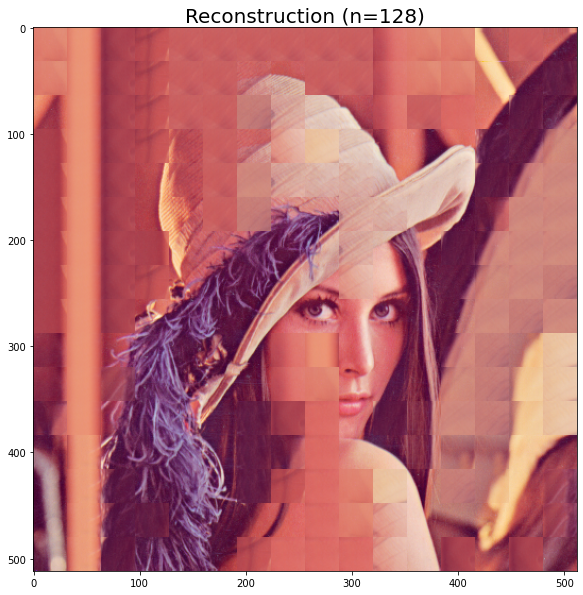

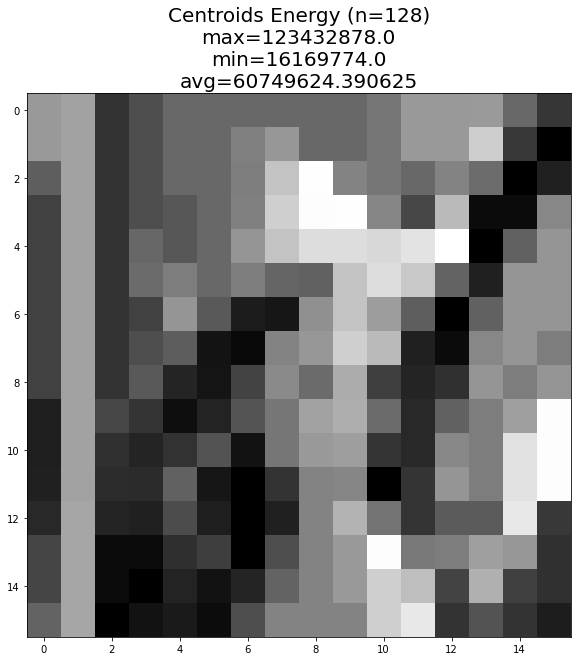

n=128, rate=8.456278483072916 bits/pixel, distortion=   8.9


In [145]:
!ln -s ~/repos/information_theory/information.py .
import information
def RD_curve(img, range_of_N_bins):
    blocks = []
    for i in range(0, img.shape[0], block_width):
        for j in range(0, img.shape[1], block_height):
            blocks.append(np.reshape(img[i:i + block_width, j:j + block_height], block_length))
    blocks = np.asarray(blocks).astype(float)
    points = []
    for n in range_of_N_bins:
        initial_centroids = np.ones(shape=(n, block_width*block_height*N_components))*255
        for i in range(n):
            initial_centroids[i] = np.round(initial_centroids[i]/n)
        k_means = cluster.KMeans(n_clusters=n, random_state=0)
        #k_means = cluster.KMeans(init="k-means++", n_clusters=n, n_init=N_tries, algorithm="elkan")
        #k_means = cluster.KMeans(init=initial_centroids, n_init=1, n_clusters=n, random_state=0, algorithm="elkan")
        k_means.fit(blocks)
        centroids = k_means.cluster_centers_.squeeze().astype(np.uint8)
        print(centroids.shape)
        centroids_energy = np.empty(centroids.shape[0])
        print("len(centroids_energy) =", len(centroids_energy))
        counter = 0
        for i in centroids:
            #print(".")
            centroids_energy[counter] = information.energy(i)
            #print(i, centroids_energy[counter])
            #centroids_energy[counter] = YUV.from_RGB(i.astype(np.int16))
            counter += 1
        print("centroids_energy =", centroids_energy)
        argsort_centroids = np.argsort(centroids_energy)
        print("argsort_centroids =", argsort_centroids)
        #lut = np.empty_like(argsort_centroids)
        #lut[argsort_centroids] = np.arange(n)
        #print("lut =", lut)

        k = k_means.labels_.astype(np.uint8)  # bit-depth depends on number of bins! 
        lut = np.empty_like(argsort_centroids)
        lut[np.arange(n)] = argsort_centroids
        print(centroids_energy[lut])
        #for i in range(n):
        #    print(centroids_energy[lut[i]])
        
        #k = argsort_centroids[k.copy()]
        #k = lut[k]
        k = k.reshape(img.shape[0]//block_height, img.shape[1]//block_width)
        y = np.empty_like(img)
        for i in range(0, img.shape[0], block_width):
            for j in range(0, img.shape[1], block_height):
                y[i:i + block_width, j:j + block_height] = centroids[k[i//block_width,j//block_height]].reshape(block_height, block_width, N_components)
        RGB_image.show(y, f"Reconstruction (n={n})")
        print("Quantization indexes: ", np.unique(k))
        #gray_image.show_normalized(lut[k])
        #gray_image.show_normalized(k)
        gray_image.show_normalized(centroids_energy[k], f"Centroids Energy (n={n})")
        #gray_image.show_normalized(centroids_energy[lut[k]])
        #rate = gray_image.write(lut[k], "/tmp/" + str(n) + '_', 0)*8/img.size
        rate = gray_image.write(k, "/tmp/" + str(n) + '_', 0)*8/img.size
        print("code-book length =", len(centroids))
        print("code-book size =", centroids.size)
        with gzip.GzipFile("/tmp/codebook.npy.gz", "w") as f:
            np.save(file=f, arr=centroids)
        #code_book_bytes = os.path.getsize("/tmp/codebook.npy.gz")
        code_book_bytes2 = RGB_image.write(centroids.reshape(n, block_width*block_height, 3), "/tmp/codebook" + str(n) + '_', 0)
        #print("code-book bytes =", code_book_bytes)
        print("code-book bytes2 =", code_book_bytes2)        
        #rate += code_book_bytes*8/(img.shape[0]*img.shape[1])
        rate += code_book_bytes2*8/(img.shape[0]*img.shape[1])
        _distortion = distortion.RMSE(img, y)
        if not n%10:
            plt.title(f"{n}")
            plt.imshow(y, cmap=plt.cm.gray, vmin=0, vmax=256)
        plt.show()
        points.append((rate, _distortion))
        print(f"n={n:>3}, rate={rate:>7} bits/pixel, distortion={_distortion:>6.1f}")
    return points
RD_points = RD_curve(img, range_of_N_bins)

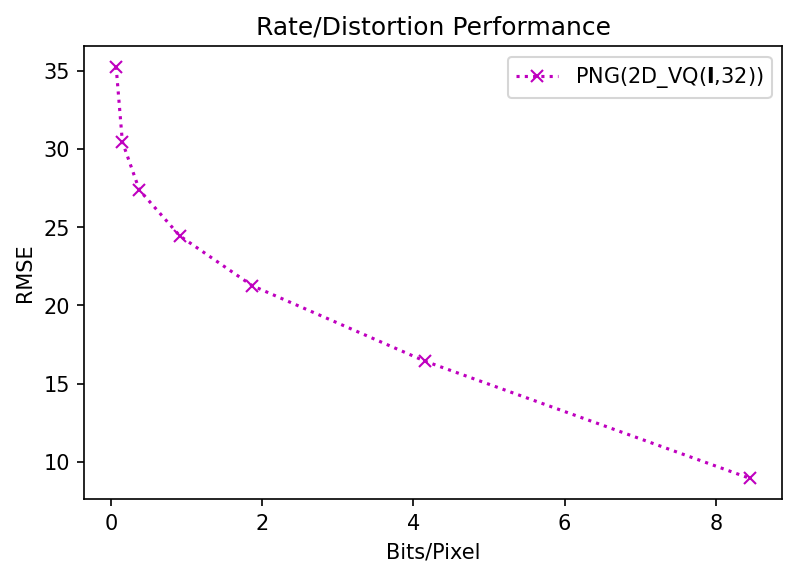

In [146]:
pylab.figure(dpi=150)
#pylab.scatter(*zip(*RD_points), label=f"VQ+PNG", s=1, marker='.')
pylab.plot(*zip(*RD_points), c='m', marker='x', label="PNG(2D_VQ($\mathbf{I}$," + f"{block_width}))", linestyle="dotted")
pylab.title(f"Rate/Distortion Performance")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("RMSE")
pylab.legend(loc='upper right')
pylab.show()

In [136]:
with open(f"VQ_2D_RGB_RD_points.txt", 'w') as f:
    for item in RD_points:
        f.write(f"{item[0]}\t{item[1]}\n")

In [ ]:
img = RGB_image.read(fn)
if YUV.name == "YCoCg":
    img = img.astype(np.int16)
if YUV.name =="color-DCT":
    img = img.astype(float)
img = YUV.from_RGB(img)
RGB_image.show_normalized(img)

In [ ]:
block_length = block_width*block_height*N_components
np.random.seed(seed=1)  # makes the random numbers predictable
k_means = cluster.KMeans(init="k-means++", n_clusters=n_clusters, n_init=N_tries)
blocks = []
for i in range(0, img.shape[0], block_width):
    for j in range(0, img.shape[1], block_height):
        blocks.append(np.reshape(img[i:i + block_width, j:j + block_height], block_length))
blocks = np.asarray(blocks).astype(float)
k_means.fit(blocks)
centroids = k_means.cluster_centers_.squeeze().astype(np.uint16)  # the code-book
labels = k_means.labels_  # Labels of the centroids

In [ ]:
labels = labels.reshape(img.shape[0]//block_height, img.shape[1]//block_width)
img_dequantized = np.empty_like(img)
for i in range(0, img.shape[0], block_width):
    for j in range(0, img.shape[1], block_height):
        img_dequantized[i:i + block_width, j:j + block_height] = centroids[labels[i//block_width,j//block_height]].reshape(block_height, block_width, N_components)

In [ ]:
#img_dequantized = img.copy()

In [ ]:
RGB_image.show_normalized(img_dequantized)
img_dequantized = YUV.to_RGB(img_dequantized).astype(np.uint8)
RGB_image.show(img_dequantized, "Dequantized Image")
assert len(centroids) == n_clusters
print("centroids =\n", centroids)
bits_per_block = int(math.log(n_clusters)/math.log(2))
print(f"{len(centroids)} centroids ({bits_per_block} bits/block)")
blocks_in_y = img.shape[0]//block_height
blocks_in_x = img.shape[1]//block_width
print(f"{blocks_in_y}x{blocks_in_x} blocks (vectors) in the image")
number_of_blocks = blocks_in_y*blocks_in_x
total_number_of_bits = number_of_blocks*bits_per_block
print(f"total number of output bytes = {total_number_of_bits//8}")

In [ ]:
def RD_curve(img, range_of_N_bins):
    if YUV.name == "YCoCg":
        img = img.astype(np.int16)
    YUV_img = YUV.from_RGB(img)
    blocks = []
    for i in range(0, YUV_img.shape[0], block_width):
        for j in range(0, YUV_img.shape[1], block_height):
            blocks.append(np.reshape(YUV_img[i:i + block_width, j:j + block_height], block_length))
    blocks = np.asarray(blocks).astype(float)
    points = []
    for n in range_of_N_bins:
        k_means = cluster.KMeans(init="k-means++", n_clusters=n, n_init=N_tries)
        k_means.fit(blocks)
        centroids = k_means.cluster_centers_.squeeze().astype(np.uint16)
        k = k_means.labels_.astype(np.uint16)  # bit-depth depends on number of bins! 
        k = k.reshape(YUV_img.shape[0]//block_height, YUV_img.shape[1]//block_width)
        YUV_y = np.empty_like(YUV_img)
        for i in range(0, YUV_img.shape[0], block_width):
            for j in range(0, YUV_img.shape[1], block_height):
                YUV_y[i:i + block_width, j:j + block_height] = centroids[k[i//block_width,j//block_height]].reshape(block_height, block_width, N_components)
        print("Quantization indexes: ", np.unique(k))
        rate = gray_image.write(k, "/tmp/" + str(n) + '_', 0)*8/img.size
        y = YUV.to_RGB(YUV_y).astype(np.uint8)
        _distortion = distortion.RMSE(img, y)
        RGB_image.show(y)
        if not n%10:
            plt.title(f"{n}")
            plt.imshow(y, cmap=plt.cm.gray, vmin=0, vmax=256)
            plt.show()
        points.append((rate, _distortion))
        print(f"n={n:>3}, rate={rate:>7} bits/pixel, distortion={_distortion:>6.1f}")
    return points

img = RGB_image.read(fn)
RD_points_YUV = RD_curve(img, range_of_N_bins)

In [ ]:
pylab.figure(dpi=150)
#pylab.scatter(*zip(*RD_points), label=f"VQ+PNG", s=1, marker='.')
pylab.plot(*zip(*RD_points), label=f"VQ(2D+RGB)+PNG", linestyle="dotted")
pylab.plot(*zip(*RD_points_YUV), label=f"VQ(2D+{YUV.name})+PNG", linestyle="dotted")
pylab.title(f"Rate/Distortion Performance")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("RMSE")
pylab.legend(loc='upper right')
pylab.show()

## Conclusions

1. VQ can remove at the same time both, the color and the spatial redundancy.

In [ ]:
import time
while True:
    time.sleep(1)